In [1]:
import pickle, os
import numpy as np, matplotlib.pyplot as plt

In [2]:
filenames = ['first_tests.pickle', 'first_tests_smaller_training_sets.pickle',
             'S2CNN_first_tests_smaller_training_sets.pickle', 'S2CNN_first_tests_2_smaller_training_sets.pickle']

loaded = []
for filename in filenames:
    with open(filename, 'rb') as file:
        loaded.append(pickle.load(file))

data = np.array(loaded[0][0][0]) # too many copies of the same data were saved, pick only one
data2 = np.array(loaded[1]).reshape(45,2)
dataS2 = np.array(loaded[2]).reshape(15,2)
dataS2_2 = np.array(loaded[3]).reshape(15,2)

In [3]:
test_acc2 = np.zeros(45)
for i in range(45):
    test_acc2[i] = data2[i][0]['test_acc']
    
test_acc2 = test_acc2.reshape(3,5,3)

test_acc1 = np.zeros(54)
for i in range(54):
    test_acc1[i] = data[i][0]['test_acc']
    
test_acc1 = test_acc1.reshape(3,6,3)

test_accS2_1 = np.zeros(15)
for i in range(15):
    test_accS2_1[i] = dataS2[i][0]['test_acc']
    
test_accS2_1 = test_accS2_1.reshape(5,3)

test_accS2_2 = np.zeros(15)
for i in range(15):
    test_accS2_2[i] = dataS2_2[i][0]['test_acc']
    
test_accS2_2 = test_accS2_2.reshape(5,3)

test_acc = np.append(test_acc2, test_acc1, axis=1)
test_accS2 = np.stack((test_accS2_1, test_accS2_2), axis=0)

best_test_acc = np.amax(test_acc, axis=2)
best_test_accS2 = np.amax(test_accS2, axis=2)

In [4]:
test_loss2 = np.zeros(45)
for i in range(45):
    test_loss2[i] = data2[i][0]['test_loss']
    
test_loss2 = test_loss2.reshape(3,5,3)

test_loss1 = np.zeros(54)
for i in range(54):
    test_loss1[i] = data[i][0]['test_loss']
    
test_loss1 = test_loss1.reshape(3,6,3)

test_lossS2_1 = np.zeros(15)
for i in range(15):
    test_lossS2_1[i] = dataS2[i][0]['test_loss']
    
test_lossS2_1 = test_lossS2_1.reshape(5,3)

test_lossS2_2 = np.zeros(15)
for i in range(15):
    test_lossS2_2[i] = dataS2_2[i][0]['test_loss']
    
test_lossS2_2 = test_lossS2_2.reshape(5,3)

test_loss = np.append(test_loss2, test_loss1, axis=1)
test_lossS2 = np.stack((test_lossS2_1, test_lossS2_2), axis=0)

best_test_loss = np.amin(test_loss, axis=2)
best_test_lossS2 = np.amin(test_lossS2, axis=2)

worst_test_loss = np.amax(test_loss, axis=2)
worst_test_lossS2 = np.amax(test_lossS2, axis=2)

Note that the maximum number of training epochs was 20, instead of 100, as in the original plot.

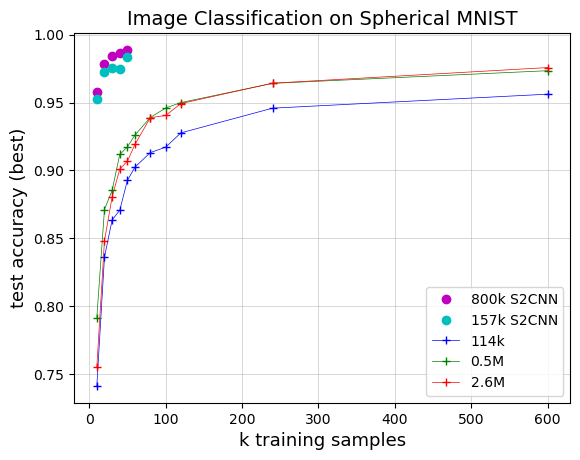

In [5]:
train_samples = [10, 20, 30, 40, 50, 60, 80, 100, 120, 240, 600]

fontsize = 13

plt.title('Image Classification on Spherical MNIST', fontsize=14)
for i, (color, label) in enumerate(zip(['m','c'], ['800k S2CNN', '157k S2CNN'])):
    plt.plot(train_samples[:5], best_test_accS2[i], 'o', color=color, label=label, linewidth='0.5')
# plt.plot(train_samples[:5], best_test_accS2, 'o', color='m', label='800k S2CNN', linewidth='0.5')
for i, (color, label) in enumerate(zip(['b','g','r'], ['114k', '0.5M', '2.6M'])):
    plt.plot(train_samples, best_test_acc[i], '+-', color=color, label=label, linewidth='0.5')
plt.grid(alpha=0.7, linewidth=0.5)
plt.legend()
plt.xlabel('k training samples', fontsize=fontsize)
plt.ylabel('test accuracy (best)', fontsize=fontsize)
plt.show()

In [6]:
print(best_test_accS2[0,1])
print(test_lossS2[0,1,1], '\n')
print(best_test_acc[2,-1])
print(test_loss[2,-1,1])

0.978600025177002
0.07282077521085739 

0.9757999777793884
173.72459411621094


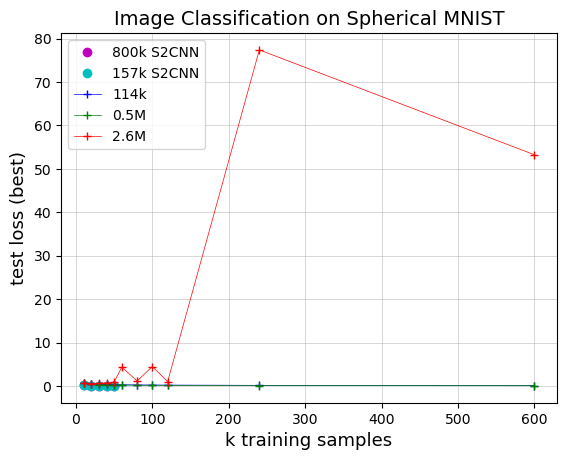

In [7]:
fontsize = 13

plt.title('Image Classification on Spherical MNIST', fontsize=14)
for i, (color, label) in enumerate(zip(['m','c'], ['800k S2CNN', '157k S2CNN'])):
    plt.plot(train_samples[:5], best_test_lossS2[i], 'o', color=color, label=label, linewidth='0.5')
for i, (color, label) in enumerate(zip(['b','g','r'], ['114k', '0.5M', '2.6M'])):
    plt.plot(train_samples, best_test_loss[i], '+-', color=color, label=label, linewidth='0.5')
plt.grid(alpha=0.7, linewidth=0.5)
plt.legend()
plt.xlabel('k training samples', fontsize=fontsize)
plt.ylabel('test loss (best)', fontsize=fontsize)
plt.show()

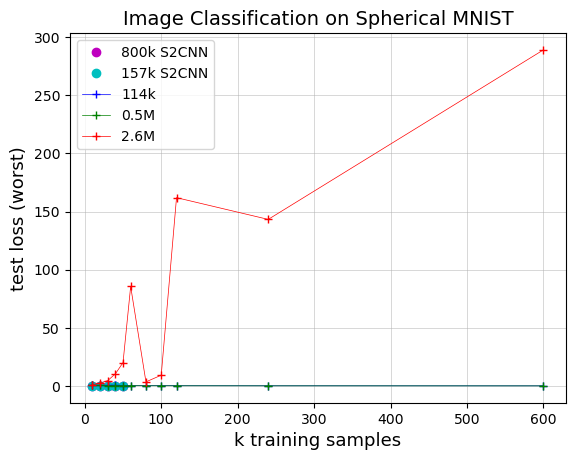

In [8]:
fontsize = 13

plt.title('Image Classification on Spherical MNIST', fontsize=14)
for i, (color, label) in enumerate(zip(['m','c'], ['800k S2CNN', '157k S2CNN'])):
    plt.plot(train_samples[:5], worst_test_lossS2[i], 'o', color=color, label=label, linewidth='0.5')
for i, (color, label) in enumerate(zip(['b','g','r'], ['114k', '0.5M', '2.6M'])):
    plt.plot(train_samples, worst_test_loss[i], '+-', color=color, label=label, linewidth='0.5')
plt.grid(alpha=0.7, linewidth=0.5)
plt.legend()
plt.xlabel('k training samples', fontsize=fontsize)
plt.ylabel('test loss (worst)', fontsize=fontsize)
plt.show()